<a href="https://colab.research.google.com/github/PrajwalKalpande/IPL-Score-and-Winner-Prediction/blob/main/IPL_ML_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import math,os
from numpy.random import choice
#import scikitplot as skplt
from time import time
import matplotlib.pyplot as plt
import sklearn


c:\Users\MAHIMA\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

from sklearn.linear_model import LinearRegression,ElasticNet, LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC,LinearSVR
from sklearn.metrics import f1_score,accuracy_score , roc_auc_score,roc_curve,precision_score,recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 

# Loading Old Data 

In [3]:
import zipfile


In [4]:
data = pd.read_csv('ipl_data.csv')

C:\Users\MAHIMA\AppData\Local\Temp\ipykernel_11112\980206372.py:1: DtypeWarning:

Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [6]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data["batting_team"]=encoder.fit_transform(data["batting_team"])
data['bowling_team']=encoder.fit_transform(data["bowling_team"])
data["winner"]=encoder.fit_transform(data["winner"].astype(str))
data["toss_winner"]=encoder.fit_transform(data["toss_winner"])
data["venue"]=encoder.fit_transform(data["venue"])
data["batsman"]=encoder.fit_transform(data["batsman"])
data["non_striker"]=encoder.fit_transform(data["non_striker"])
data["bowler"]=encoder.fit_transform(data["bowler"])
data["team1"]=encoder.fit_transform(data["team1"])
data["team2"]=encoder.fit_transform(data["team2"])

In [7]:
#outcome variable team1_win as team1 winning the match
data.loc[data["winner"]==data["team1"],"team1_win"]=1
data.loc[data["winner"]!=data["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
data.loc[data["toss_winner"]==data["team1"],"team1_toss_win"]=1
data.loc[data["toss_winner"]!=data["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
data["team1_bat"]=0
data.loc[(data["team1_toss_win"]==1) & (data["toss_decision"]=="bat"),"team1_bat"]=1

In [8]:
data['ball'] = data['over'] + data['ball']/10.0


In [9]:
data['id_inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)

data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat,id_inning
0,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0,3359827
1,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827
2,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,wides,7,12,2008,0.0,1.0,0,3359827
3,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827
4,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,...,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827


In [10]:
print(len(data['id'].unique()))
len(data['id_inning'].unique())
# As expected total innings played are twice of the total matches played

812


1624

In [11]:
data1 = data.copy()
data1 = data1.groupby(by=['id_inning']).sum()['total_runs'].reset_index()
data1.head()

,id_inning,total_runs
0,108259112,172
1,108259113,207
2,108259211,187
3,10825928,184
4,10825934,183


In [12]:
data2 = pd.merge(left=data1, right=data, on='id_inning', how='right')
print(data2.shape)
data2  = data2.set_index('id')
data2 


(193096, 40)


,id_inning,total_runs_x,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat
id,,,,,,,,,,,,,,,,,,,,,
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,...,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,...,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,...,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1


In [13]:
data2.reset_index(inplace= True)
data2.head()

,id,id_inning,total_runs_x,city,date,player_of_match,venue,neutral_venue,team1,team2,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat
0,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0
1,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
2,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0
3,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
4,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,...,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0


In [14]:
df = pd.DataFrame()
for i in range(len(data2['inning'].unique())):
    one_inning = data2.loc[data2['inning']==data2['inning'].unique()[i]]
    one_inning = one_inning.sort_values(['year','id_inning','over', 'ball'], ascending=[True,True,True, True])
    one_inning = one_inning[['id_inning','year','inning','ball','venue','batsman','bowler','batting_team','bowling_team',
                             'is_wicket','total_runs_y','total_runs_x','team1_toss_win','team1_win','team1_bat','team1','team2']].reset_index(drop=True)
    #the number of columns are high here since we need the later ones for winner prediction and earlier ones for score prediction                       
    one_inning['current_runs'] = one_inning.groupby(['id_inning'])['total_runs_y'].cumsum()
    one_inning['current_wickets'] = one_inning.groupby(['id_inning'])['is_wicket'].cumsum()
    

    one_inning.tail()
    frame = [df,one_inning]
    df = pd.concat(frame)
print(data2.shape)
print(df.shape)

(193096, 40)
(193096, 19)


In [15]:
df['runs_last5']= df['total_runs_y'].rolling(min_periods=1, window=30).sum()

In [16]:
df['wickets_last5']= df['is_wicket'].rolling(min_periods=1, window=30).sum()

In [17]:
df.head()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,...,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
0,3359827,2008,1,1.1,14,431,264,7,12,0,...,222,1.0,0.0,0,12,7,1,0,1.0,0.0
1,3359827,2008,1,1.2,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,1,0,1.0,0.0
2,3359827,2008,1,1.3,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,2,0,2.0,0.0
3,3359827,2008,1,1.4,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,2,0,2.0,0.0
4,3359827,2008,1,1.5,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,2,0,2.0,0.0


In [18]:
df = df[df['ball'].astype(int)>=5]
df.head()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,...,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
26,3359827,2008,1,5.1,14,431,264,7,12,0,...,222,1.0,0.0,0,12,7,54,0,54.0,0.0
27,3359827,2008,1,5.2,14,431,264,7,12,0,...,222,1.0,0.0,0,12,7,55,0,55.0,0.0
28,3359827,2008,1,5.3,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,59,0,59.0,0.0
29,3359827,2008,1,5.4,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,59,0,59.0,0.0
30,3359827,2008,1,5.5,14,77,264,7,12,0,...,222,1.0,0.0,0,12,7,60,0,59.0,0.0


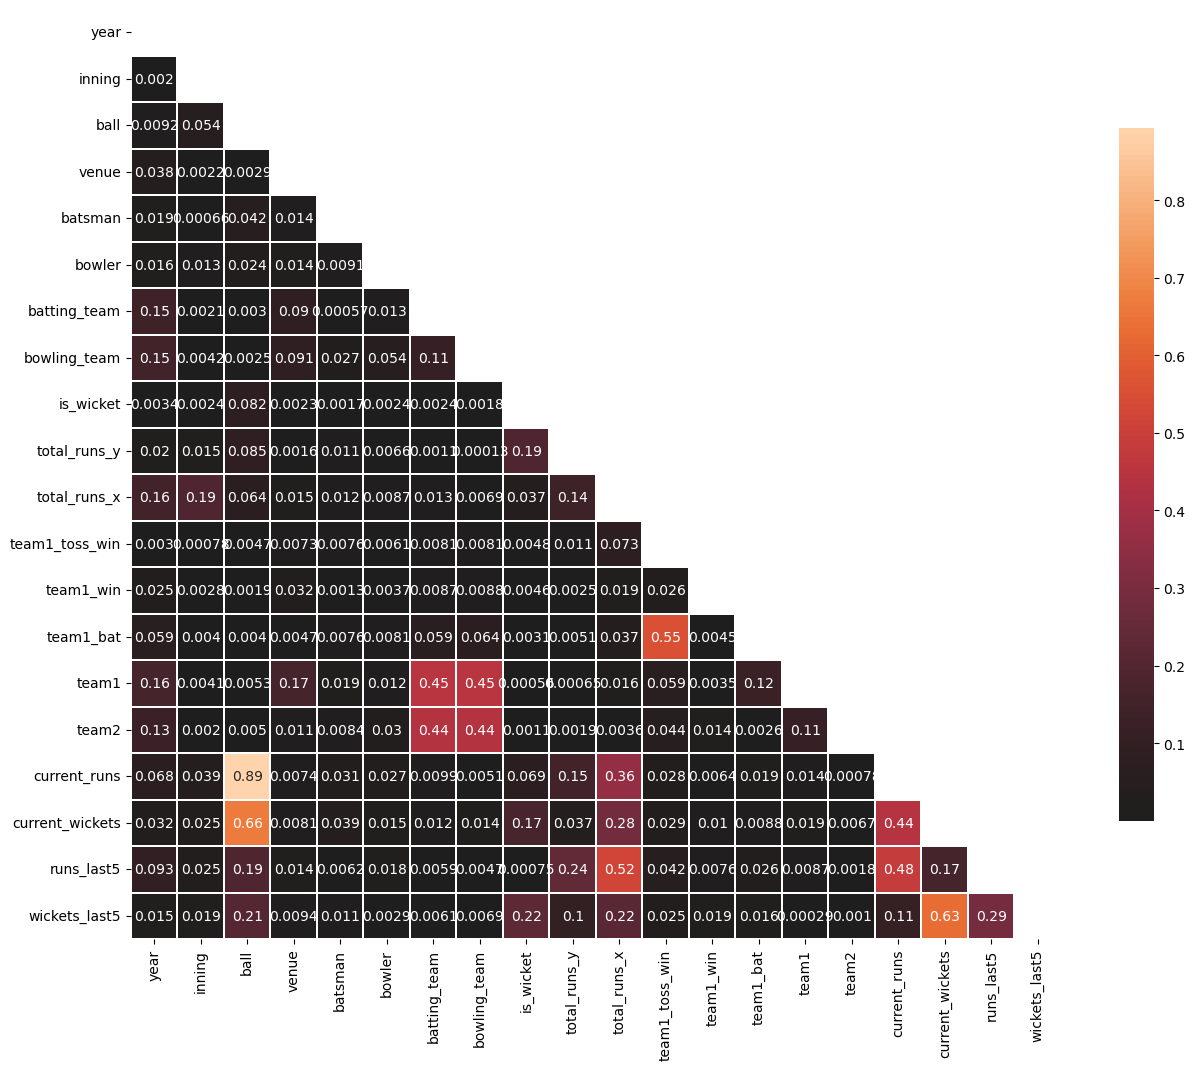

In [19]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool) )

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 18))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap =  sns.diverging_palette(150, 275, s=80, l=55, n=20,as_cmap=True) 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,    center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5},annot=True)
plt.show()

In [20]:
X_train_data = df[df['year'] <2020]
X_train_data.tail()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,...,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
86200,11817680,2019,2,20.2,24,372,350,0,8,0,...,148,1.0,1.0,1,8,0,143,5,58.0,1.0
86201,11817680,2019,2,20.3,24,456,350,0,8,0,...,148,1.0,1.0,1,8,0,145,5,60.0,1.0
86202,11817680,2019,2,20.4,24,456,350,0,8,1,...,148,1.0,1.0,1,8,0,146,6,59.0,2.0
86203,11817680,2019,2,20.5,24,448,350,0,8,0,...,148,1.0,1.0,1,8,0,148,6,61.0,2.0
86204,11817680,2019,2,20.6,24,448,350,0,8,1,...,148,1.0,1.0,1,8,0,148,7,60.0,3.0


In [21]:
X_test_data = df[df['year']==2020]


In [22]:
X_train_data.drop(columns= ['id_inning'],inplace = True)
X_test_data.drop(columns= ['id_inning'],inplace = True)

In [23]:
X_train_data.head()

,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,total_runs_y,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
26,2008,1,5.1,14,431,264,7,12,0,4,222,1.0,0.0,0,12,7,54,0,54.0,0.0
27,2008,1,5.2,14,431,264,7,12,0,1,222,1.0,0.0,0,12,7,55,0,55.0,0.0
28,2008,1,5.3,14,77,264,7,12,0,4,222,1.0,0.0,0,12,7,59,0,59.0,0.0
29,2008,1,5.4,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,59,0,59.0,0.0
30,2008,1,5.5,14,77,264,7,12,0,1,222,1.0,0.0,0,12,7,60,0,59.0,0.0


## Predicting Score

In [24]:
X_train_data.columns

Index(['year', 'inning', 'ball', 'venue', 'batsman', 'bowler', 'batting_team',
       'bowling_team', 'is_wicket', 'total_runs_y', 'total_runs_x',
       'team1_toss_win', 'team1_win', 'team1_bat', 'team1', 'team2',
       'current_runs', 'current_wickets', 'runs_last5', 'wickets_last5'],
      dtype='object')

In [25]:
len(X_train_data.columns)

20

In [26]:
reg_feature_columns = X_train_data.columns[[1,2,3,4,5,11,13,14,15,16,18,19]]
X_train_data.rename(columns={'total_runs_x': 'final_score'}, inplace=True)
X_test_data.rename(columns={'total_runs_x': 'final_score'}, inplace=True)
target = X_train_data.columns[10]
print(target)

final_score


In [27]:
reg_feature_columns

Index(['inning', 'ball', 'venue', 'batsman', 'bowler', 'team1_toss_win',
       'team1_bat', 'team1', 'team2', 'current_runs', 'runs_last5',
       'wickets_last5'],
      dtype='object')

In [28]:
len(reg_feature_columns)

12

In [29]:
X_train = X_train_data[reg_feature_columns]
X_test = X_test_data[reg_feature_columns]
y_train = X_train_data[target]
y_test = X_test_data[target]

In [30]:
print(X_train.shape)

(140925, 12)


In [31]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#standardizing the data

### Linear Regression 

In [32]:
def custom_accuracy(y_test,y_pred,threshold=10):
    right = 0
    l = y_test.shape[0]
    for i in range(0,l-1):
        if(abs(y_pred[i]-y_test[i]) <= threshold):
            right += 1
        
    return ((right/l)*100)
#If predicted score is within 10 runs margin of actual score it is treated as correct prediction

In [33]:
def plotvals(y_test,y_pred) :

  fig = plt.figure(figsize=(9,6))
  sns.kdeplot(y_pred, shade=True, color="g", label="Predicted Values", alpha=.7)
  sns.kdeplot(y_test, shade=True, color="dodgerblue", label="Actual Values", alpha=.7)
  
  plt.title('Predicting Final Scores', fontsize=16)
  plt.legend()
  plt.show()

In [34]:
def eval(y_test,y_pred,threshold=10) :
  mae = mean_absolute_error(y_test , y_pred)
  rmse=  np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test,y_pred)
  acc = custom_accuracy(y_test,y_pred,threshold)
  return {"MAE":mae,"RMSE":rmse,"R2score":r2,"Custom Accuracy":acc}

In [35]:
modeldict={}

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [37]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [38]:
y_pred = y_pred.astype(int)
y_pred.shape[0]

11517

In [39]:
eval(y_test.values,y_pred)

{'MAE': 14.691412694278023,
 'RMSE': 19.380890360733822,
 'R2score': 0.5255066839745284,
 'Custom Accuracy': 47.19979161239906}

In [40]:
modeldict['Linear Regression'] = eval(y_test.values,y_pred)

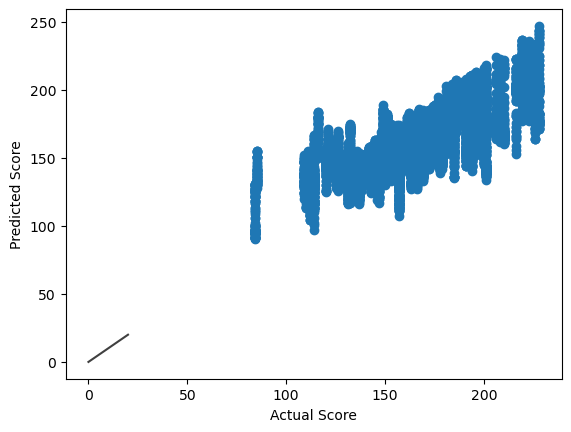

In [41]:

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
fig,ax = plt.subplots()
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0) #plotting y=x line
ax.scatter(y_test,y_pred)
plt.ylabel('Predicted Score')
plt.xlabel('Actual Score')
plt.show()

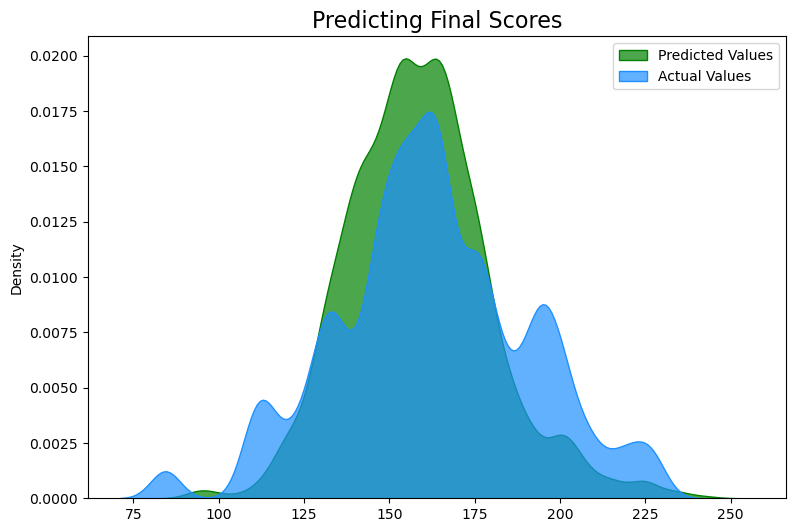

In [42]:
plotvals(y_test.values,y_pred)

The predicted scores are evenly distributed on both sides of the line

### SVR

In [55]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train )

SVR()

In [56]:
y_pred = regressor.predict(X_test)


In [57]:
eval(y_test.values,y_pred)

{'MAE': 14.631978190368686,
 'RMSE': 19.28656934930026,
 'R2score': 0.5301138805268051,
 'Custom Accuracy': 45.74976122254059}

In [58]:
modeldict['SVR'] = eval(y_test.values,y_pred)

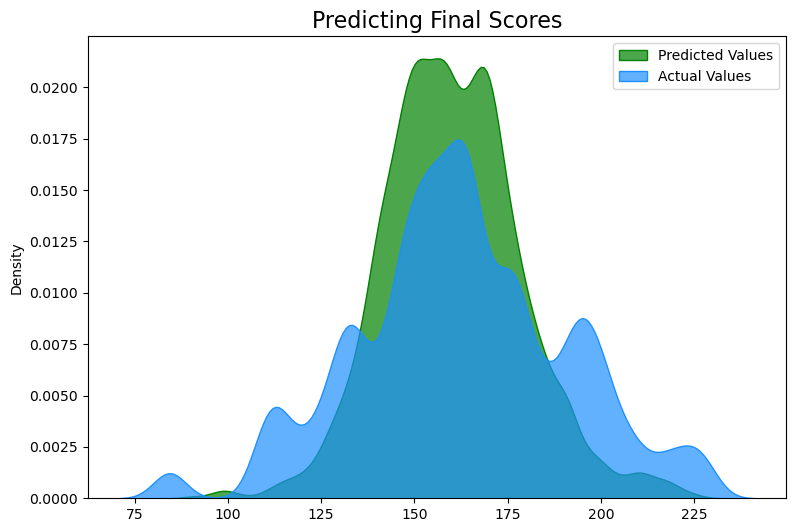

In [59]:
plotvals(y_test.values,y_pred)

Not better than Linear Regression and also took lot of time to train.

### Random Forest

In [60]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Since higher no. of estimators and depth had given pretty good results in trials performing Grid Search below with higher values for both hyperparameters.

In [61]:
%%time
rf_best2 = RandomForestRegressor(random_state=300,max_features=None,
                                    n_estimators=500,
                                    max_depth = 100,
                                    )
rf_best2.fit(X_train,y_train)
y_pred = rf_best2.predict(X_test)
score = rf_best2.score(X_test,y_test)


Wall time: 6min 22s


In [62]:
eval(y_test.values,y_pred)

{'MAE': 15.57745263523487,
 'RMSE': 20.90106237926074,
 'R2score': 0.4481521276444853,
 'Custom Accuracy': 45.76712685595207}

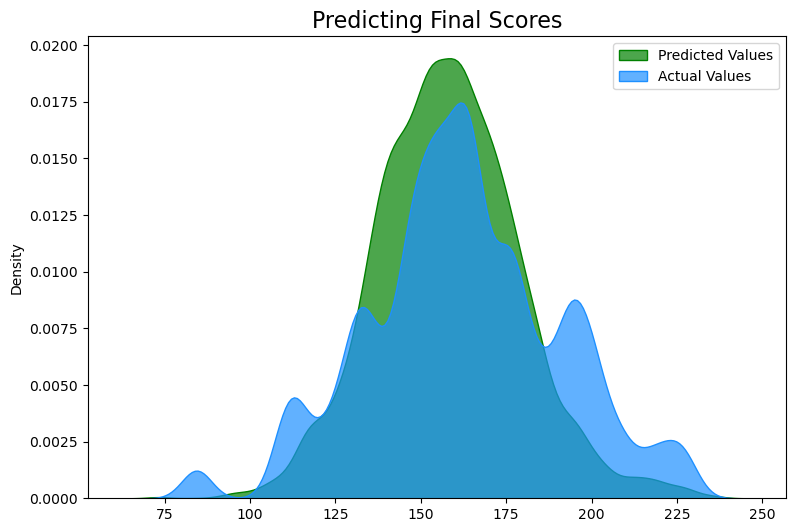

In [63]:
plotvals(y_test.values,y_pred)

In [64]:
predict_train = rf_best2.predict(X_train)

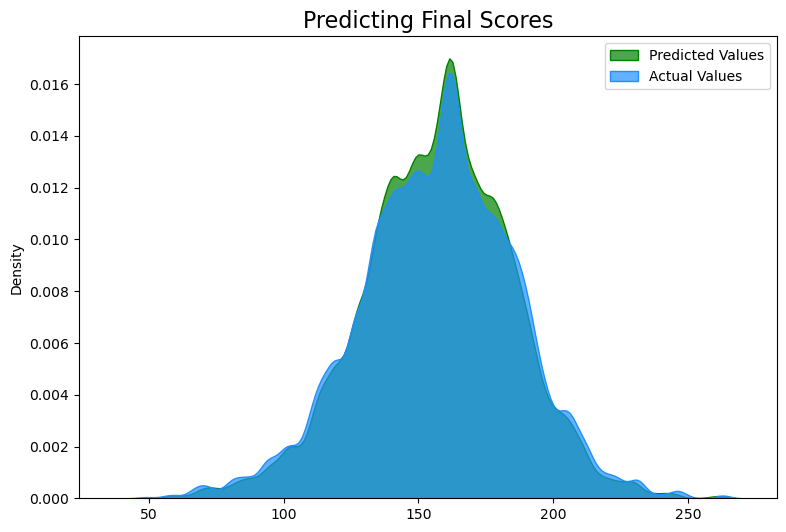

In [65]:
plotvals(y_train.values,predict_train)

### Loading another modified dataset for better predictions

In [66]:
df_reg = pd.read_csv('data/ipl_predict_complex.csv')

In [67]:
df_reg = df_reg.drop(['Unnamed: 0','id_inning'],axis=1)

In [68]:
df_reg.head()

,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,total_runs_y,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets
0,2008,1,1.1,14,431,264,7,12,0,1,222,1.0,0.0,0,12,7,1,0
1,2008,1,1.2,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,1,0
2,2008,1,1.3,14,77,264,7,12,0,1,222,1.0,0.0,0,12,7,2,0
3,2008,1,1.4,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,2,0
4,2008,1,1.5,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,2,0


In [69]:
X_test_data = df_reg[df_reg['year']==2020]
X_train_data=df_reg[df_reg['year']<2020]


### Comparing Train and Test Data Distribution

In [70]:
def comparedist(y_train,y_test,string):
  fig = plt.figure(figsize=(9,6))
  xaxis = np.arange(1, y_test.shape[0]+1,1)
  sns.kdeplot(y_train, shade=True, color="dodgerblue", label="Training Data", alpha=.5)
  sns.kdeplot(y_test, shade=True, color="purple", label="Test Data", alpha=.5)
  
  plt.title(f'Final Score distribution in Train and Test data ({string})', fontsize=12)
  plt.legend()
  plt.show()

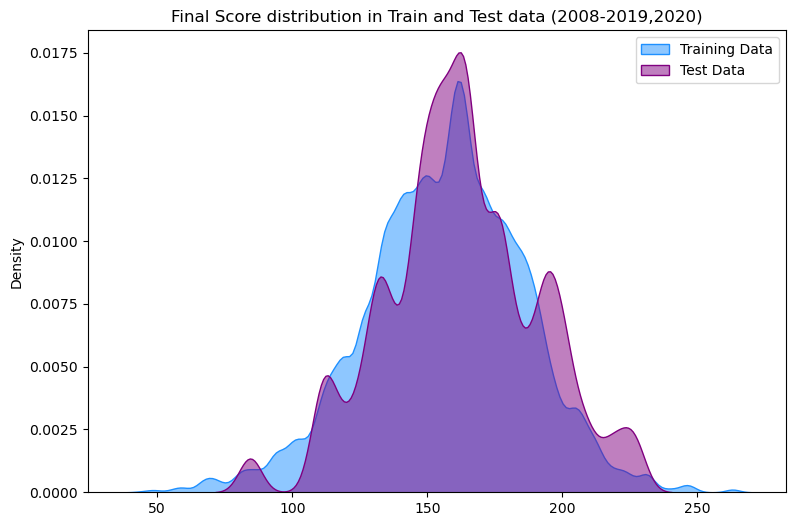

In [71]:
comparedist(X_train_data['total_runs_x'].values,X_test_data['total_runs_x'].values,'2008-2019,2020')

Thus we see that there is considerable difference in the distribution of train and test data. This is likely due to the less relevant data of 2008,2009,etc. Let us use more recent data i.e. ahead of 2010 to see the new distributions

In [72]:
X_train_data=df_reg[df_reg['year']>2012]


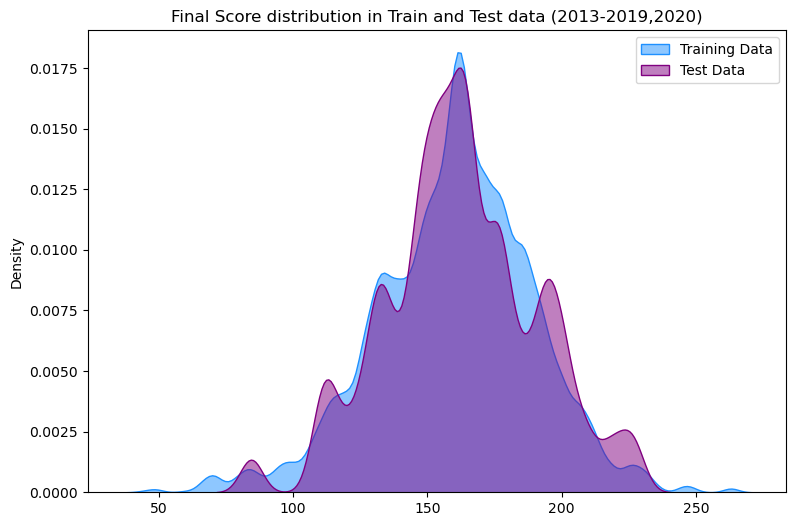

In [73]:
comparedist(X_train_data['total_runs_x'].values,X_test_data['total_runs_x'].values,'2013-2019,2020')

This looks little better. Let us predict!